# Singapore Country

In [1]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
menhap_df = pd.read_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/final_data.xlsx")
menhap_df

,country,year,Schizophrenia,Bipolar,Eating_Disorders,Anxiety,Drug_Use,Depression,Alcohol_Use,Life_Ladder,Log_GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Positive_Affect,Negative_Affect,Ladder_Std_Dev,GINI_Index
0,Brunei,1990,0.274544,0.617719,0.550731,3.548453,0.911231,2.577977,0.771017,6.233732,10.826301,0.790585,70.994705,0.767580,0.073472,0.062403,0.569497,0.166263,2.052102,0.622453
1,Brunei,1991,0.273819,0.618347,0.548010,3.554565,0.910156,2.562828,0.770862,6.437663,11.145486,0.793567,73.141360,0.789073,0.054550,0.226984,0.550824,0.112444,2.006036,0.584078
2,Brunei,1992,0.273212,0.618986,0.545544,3.561621,0.910287,2.551382,0.770430,6.586561,10.776199,0.823234,73.563922,0.787172,0.043634,0.148619,0.712836,0.185052,2.053332,0.560275
3,Brunei,1993,0.272736,0.619673,0.543644,3.569155,0.910409,2.543804,0.769584,6.821280,11.119712,0.811811,71.970894,0.801130,0.071169,0.054491,0.472039,0.127140,2.031076,0.612157
4,Brunei,1994,0.272383,0.620342,0.542626,3.576319,0.908915,2.538465,0.768343,6.192638,10.400065,0.752147,73.270498,0.705897,0.086336,0.107812,0.650715,0.138546,2.073008,0.559053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Vietnam,2013,0.241026,0.550479,0.119353,2.039645,0.673579,2.884934,1.722689,5.022699,8.541249,0.759477,65.545815,0.919607,-0.024637,0.771246,0.718431,0.165225,1.404304,0.381849
304,Vietnam,2014,0.241883,0.551005,0.121583,2.045305,0.677829,2.882767,1.728448,5.084923,8.588622,0.792168,65.677925,0.845240,0.002126,0.779896,0.701386,0.240607,1.769163,0.414816
305,Vietnam,2015,0.242783,0.551548,0.123609,2.051937,0.682933,2.881750,1.733233,5.076315,8.642591,0.848677,65.810028,0.897333,0.087220,0.747188,0.642237,0.232416,1.794858,0.398138
306,Vietnam,2016,0.243709,0.552084,0.126256,2.059037,0.687896,2.879813,1.736929,5.062267,8.692120,0.876324,65.942139,0.894351,-0.088430,0.799240,0.536226,0.222550,1.767819,0.375812


In [3]:
menhap_df.dtypes

country                object
year                    int64
Schizophrenia         float64
Bipolar               float64
Eating_Disorders      float64
Anxiety               float64
Drug_Use              float64
Depression            float64
Alcohol_Use           float64
Life_Ladder           float64
Log_GDP_per_Capita    float64
Social_Support        float64
Life_Expectancy       float64
Freedom               float64
Generosity            float64
Corruption            float64
Positive_Affect       float64
Negative_Affect       float64
Ladder_Std_Dev        float64
GINI_Index            float64
dtype: object

In [4]:
lifeladder_df = menhap_df.loc[:, ["year", 'country', 'Life_Ladder']]
lifeladder_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
...,...,...,...
303,2013,Vietnam,5.022699
304,2014,Vietnam,5.084923
305,2015,Vietnam,5.076315
306,2016,Vietnam,5.062267


In [5]:
# Mengambil data untuk country tertentu
singa_df = lifeladder_df.loc[lifeladder_df['country'] == 'Singapore']
singa_df['year'] = pd.to_datetime(singa_df['year'], format='%Y')
singa_df = pd.Series(singa_df['Life_Ladder'].values, index=singa_df.year, name='Life_Ladder')
singa_df.index = pd.DatetimeIndex(singa_df.index, 
                                      freq=singa_df.index.inferred_freq)

singa_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_3640\909762648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  singa_df['year'] = pd.to_datetime(singa_df['year'], format='%Y')


year
1990-01-01    6.586823
1991-01-01    6.428018
1992-01-01    6.794509
1993-01-01    6.053115
1994-01-01    6.998357
1995-01-01    6.549332
1996-01-01    6.107963
1997-01-01    6.212303
1998-01-01    6.621210
1999-01-01    6.322557
2000-01-01    6.915879
2001-01-01    6.382047
2002-01-01    6.501425
2003-01-01    6.276460
2004-01-01    6.057548
2005-01-01    6.086865
2006-01-01    6.462703
2007-01-01    6.833755
2008-01-01    6.641957
2009-01-01    6.144677
2010-01-01    6.531402
2011-01-01    6.561042
2012-01-01    6.931935
2013-01-01    6.533207
2014-01-01    7.062365
2015-01-01    6.619525
2016-01-01    6.033481
2017-01-01    6.882809
Freq: AS-JAN, Name: Life_Ladder, dtype: float64

In [6]:
singa_list = singa_df.tolist()
singa_list

[6.586822535279818,
 6.428018348652174,
 6.794508597901171,
 6.053115003430468,
 6.99835713581938,
 6.54933245526146,
 6.107963056564087,
 6.212302655730094,
 6.621210292398358,
 6.322557484674277,
 6.915878736810959,
 6.382047012167151,
 6.501425172198389,
 6.276460404228478,
 6.057548224510252,
 6.086865395292711,
 6.462702751159668,
 6.833754539489746,
 6.641956806182861,
 6.144676685333252,
 6.531401634216309,
 6.561041831970215,
 6.931935203587008,
 6.533206939697266,
 7.06236457824707,
 6.619524955749512,
 6.033480644226074,
 6.882809038439158]

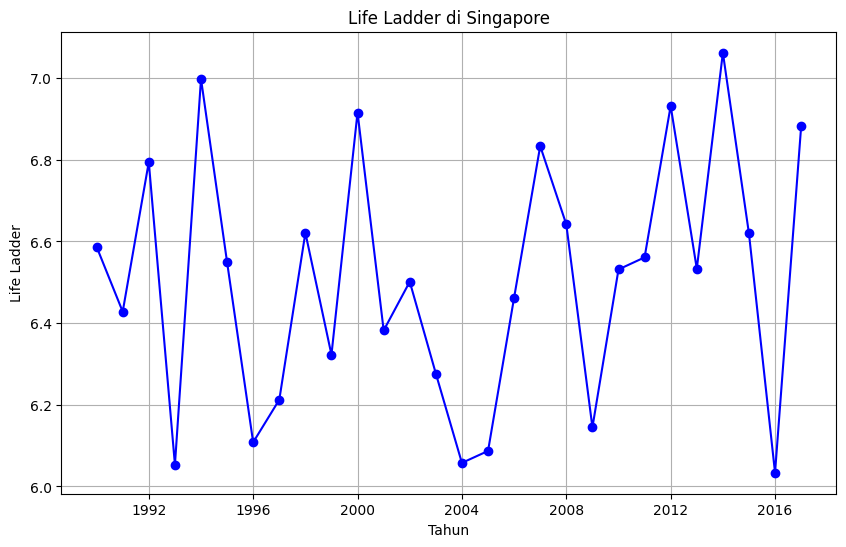

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(singa_df.index, singa_list, marker='o', linestyle='-', color='b')
plt.title('Life Ladder di Singapore')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()

### model SES

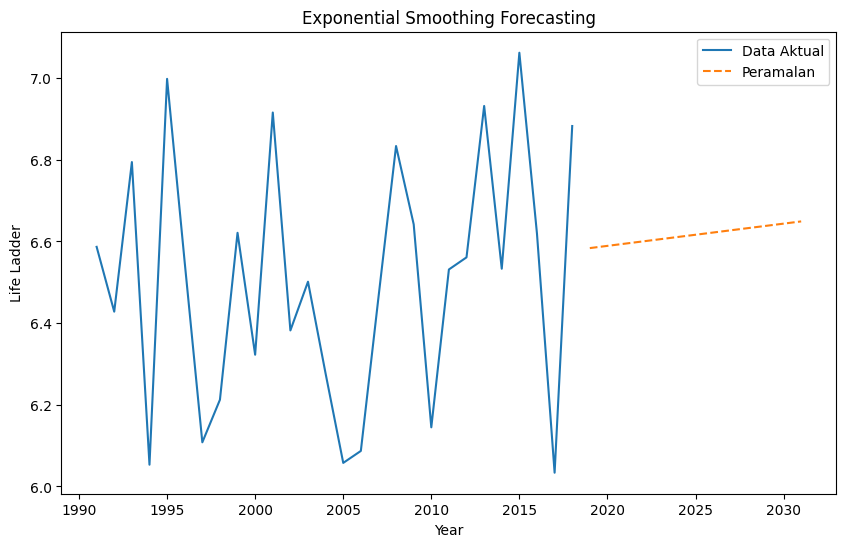

            forecast
2018-12-31  6.583756
2019-12-31  6.589204
2020-12-31  6.594652
2021-12-31  6.600100
2022-12-31  6.605549
2023-12-31  6.610997
2024-12-31  6.616445
2025-12-31  6.621893
2026-12-31  6.627341
2027-12-31  6.632789
2028-12-31  6.638237
2029-12-31  6.643685
2030-12-31  6.649133


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(singa_list), freq='Y')
life_ladder_series = pd.Series(singa_list, index=years)

# Buat model Exponential Smoothing
model = ExponentialSmoothing(life_ladder_series, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Buat prediksi untuk beberapa tahun ke depan
forecast_steps = 13
forecast = fit.forecast(steps=forecast_steps)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(forecast, label='Peramalan', linestyle='--')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
forecast_years = pd.date_range(start=years[-1] + pd.offsets.YearBegin(), periods=forecast_steps, freq='Y')
forecast_df = pd.DataFrame({'forecast': forecast})

print(forecast_df)


### Moving Average

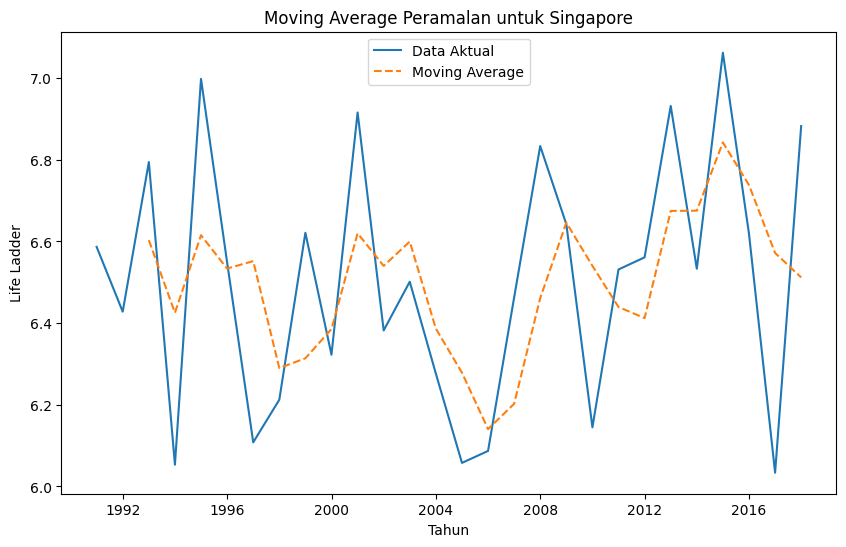

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(singa_list), freq='Y')
life_ladder_series = pd.Series(singa_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 3 tahun)
window_size = 3
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Singapore')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

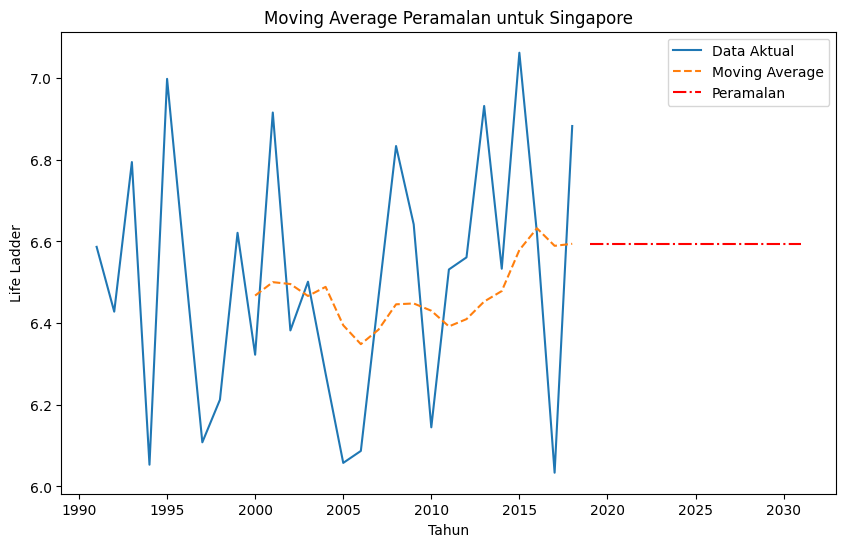

            forecast
year                
2018-12-31   6.59424
2019-12-31   6.59424
2020-12-31   6.59424
2021-12-31   6.59424
2022-12-31   6.59424
2023-12-31   6.59424
2024-12-31   6.59424
2025-12-31   6.59424
2026-12-31   6.59424
2027-12-31   6.59424
2028-12-31   6.59424
2029-12-31   6.59424
2030-12-31   6.59424


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(singa_list), freq='Y')
life_ladder_series = pd.Series(singa_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 10 tahun)
window_size = 10
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Prediksi 10 tahun ke depan
last_moving_avg = moving_average.iloc[-1]
forecast_years = pd.date_range(start=life_ladder_series.index[-1] + pd.DateOffset(years=1), periods=13, freq='Y')
forecast_values = np.full(13, last_moving_avg)

# Buat DataFrame untuk prediksi
forecast_ma = pd.DataFrame({'year': forecast_years, 'forecast': forecast_values})
forecast_ma.set_index('year', inplace=True)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.plot(forecast_ma, label='Peramalan', linestyle='-.', color='red')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Singapore')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
print(forecast_ma)

### linear regresion

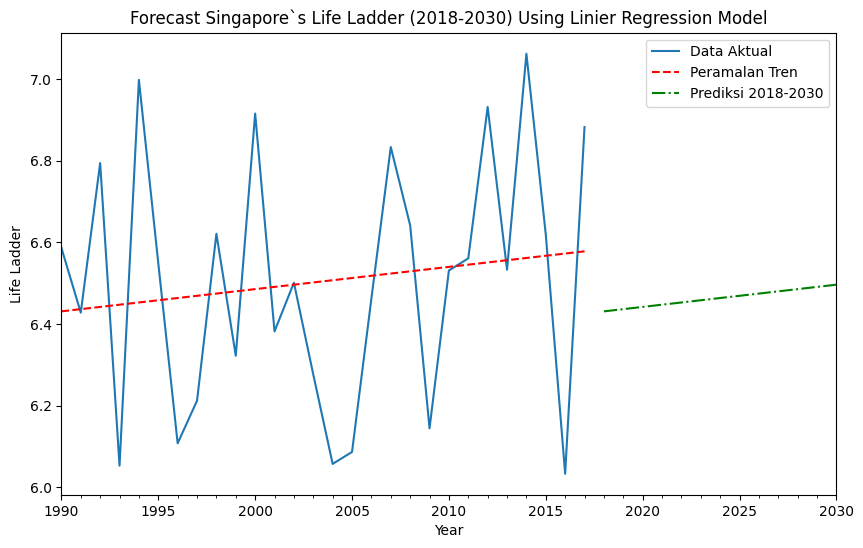

2018-12-31    6.431211
2019-12-31    6.436659
2020-12-31    6.442107
2021-12-31    6.447555
2022-12-31    6.453003
2023-12-31    6.458451
2024-12-31    6.463899
2025-12-31    6.469347
2026-12-31    6.474795
2027-12-31    6.480243
2028-12-31    6.485691
2029-12-31    6.491139
2030-12-31    6.496587
Freq: A-DEC, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import tsatools

# Membuat data Life Ladder dari daftar yang ada
years = pd.date_range(start='1990', periods=len(singa_list), freq='Y')
life_ladder_series = pd.Series(singa_list, index=years, name='Life_Ladder')

# Menambahkan tren
singa_df = tsatools.add_trend(life_ladder_series, trend='ct')

# Membangun model regresi linear
singa_lm = sm.OLS(singa_df['Life_Ladder'], singa_df[['trend', 'const']]).fit()

# Membuat data untuk prediksi dari 2018 sampai 2030
forecast_years = pd.date_range(start='2018', end='2031', freq='Y')
forecast_df = pd.DataFrame(index=forecast_years)
forecast_df = tsatools.add_trend(forecast_df, trend='ct')

# Membuat prediksi
forecast_values = singa_lm.predict(forecast_df[['trend', 'const']])

# Plot hasil
plt.figure(figsize=(10, 6))
ax = life_ladder_series.plot(title='Forecast Singapore`s Life Ladder (2018-2030) Using Linier Regression Model')
singa_lm.predict(singa_df[['trend', 'const']]).plot(ax=ax, linestyle='--', color='red')
forecast_values.plot(ax=ax, linestyle='-.', color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder')
plt.legend(['Data Aktual', 'Peramalan Tren', 'Prediksi 2018-2030'])
plt.show()

# Menampilkan prediksi
print(forecast_values)

forecast_values.to_excel("D:\PENS\Semester_4\Data Mining\PBL_Datamining\hasil_forecast\singapore_for_lr.xlsx", index=False)

### ARIMA

Forecast for Singapore's Life Ladder (2018-2030):
            forecast
2018-12-31  6.474660
2019-12-31  6.505873
2020-12-31  6.503486
2021-12-31  6.503669
2022-12-31  6.503655
2023-12-31  6.503656
2024-12-31  6.503656
2025-12-31  6.503656
2026-12-31  6.503656
2027-12-31  6.503656
2028-12-31  6.503656
2029-12-31  6.503656
2030-12-31  6.503656


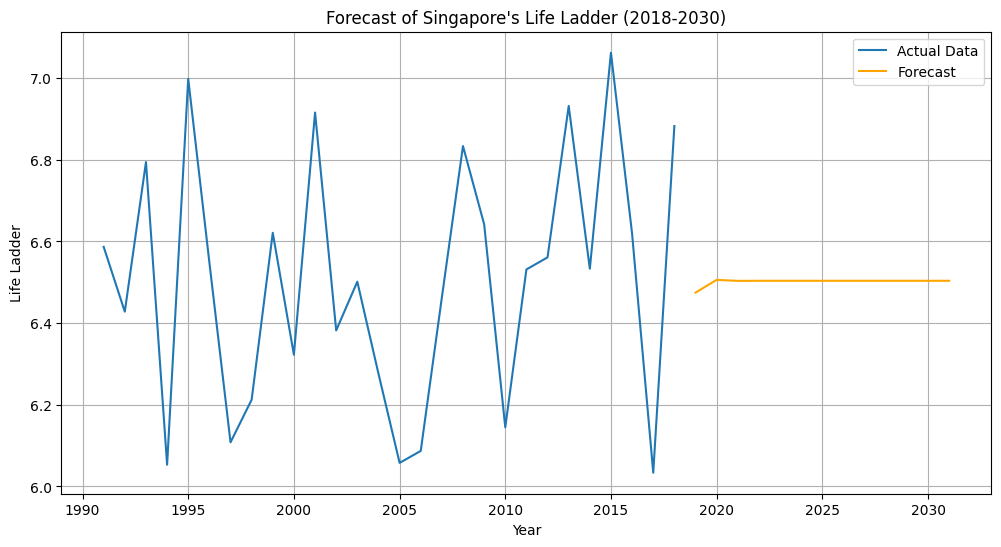

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Konversi life_ladder_list menjadi Series dengan index tahun
years = pd.date_range(start='1990', periods=len(singa_list), freq='Y')
life_ladder_series = pd.Series(singa_list, index=years)

# Misalkan model ARIMA yang sudah kita latih sebelumnya adalah ARIMA(1,1,1)
model = ARIMA(life_ladder_series, order=(1, 1, 1))
model_fit = model.fit()

# Melakukan peramalan untuk 14 tahun ke depan (dari tahun 2018 hingga 2030)
forecast = model_fit.forecast(steps=13)

# Tampilkan hasil peramalan
print("Forecast for Singapore's Life Ladder (2018-2030):")
forecast_years = pd.date_range(start='2018-01-01', periods=13, freq='Y')
forecast_arima = pd.DataFrame({'forecast': forecast})
print(forecast_arima)

# Visualisasikan hasil peramalan
plt.figure(figsize=(12, 6))
plt.plot(life_ladder_series, label='Actual Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("Forecast of Singapore's Life Ladder (2018-2030)")
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid(True)
plt.show()


## Evaluation Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Buat DataFrame baru dengan life_ladder_list dan tahun sebagai indeks
singa_df_new = pd.DataFrame({'Life_Ladder': singa_list}, index=years)

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = singa_df_new.index.year.values.reshape(-1, 1)  # Ambil tahun dari indeks DataFrame
y = singa_df_new['Life_Ladder'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Regresi Linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
forecast_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, forecast_lr)
mape_lr = np.mean(np.abs((y_test - forecast_lr) / y_test)) * 100
rmse_lr = np.sqrt(mean_squared_error(y_test, forecast_lr))


In [14]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = life_ladder_series.index.to_numpy().reshape(-1, 1)  # Menggunakan tahun sebagai fitur
y = life_ladder_series.values  # Life Ladder sebagai target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model SES
model_ses = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)
fit_ses = model_ses.fit()
forecast_ses = fit_ses.forecast(steps=len(X_test))
mae_ses = mean_absolute_error(y_test, forecast_ses)
mape_ses = np.mean(np.abs((y_test - forecast_ses) / y_test)) * 100
rmse_ses = np.sqrt(mean_squared_error(y_test, forecast_ses))

# Model ARIMA
model_arima = ARIMA(y_train, order=(1, 1, 1))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=len(X_test))
mae_arima = mean_absolute_error(y_test, forecast_arima)
mape_arima = np.mean(np.abs((y_test - forecast_arima) / y_test)) * 100
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima))

# Model MA
window_size = 3
singa_df['Moving Average'] = singa_df['Life_Ladder'].rolling(window=window_size, min_periods=1).mean()
actual_data = singa_df['Life_Ladder']
ma_forecast = singa_df['Moving Average']
mae_ma = mean_absolute_error(actual_data, ma_forecast)
mape_ma = np.mean(np.abs((actual_data - ma_forecast) / actual_data)) * 100
rmse_ma = np.sqrt(mean_squared_error(actual_data, ma_forecast))


In [15]:
print(forecast_lr)
print(forecast_ses)
print(forecast_arima)
print(ma_forecast.tail(20))

[6.44892183 6.4964212  6.44595312 6.48454636 6.42220344 6.45782797
 6.47267152 6.48751507 6.45485925]
[6.38466991 6.37696349 6.36925707 6.36155064 6.35384422 6.34613779
 6.33843137 6.33072495 6.32301852]
[6.4075289  6.45004894 6.45608419 6.45694083 6.45706242 6.45707968
 6.45708213 6.45708247 6.45708252]
1998-12-31    6.313825
1999-12-31    6.385357
2000-12-31    6.619882
2001-12-31    6.540161
2002-12-31    6.599784
2003-12-31    6.386644
2004-12-31    6.278478
2005-12-31    6.140291
2006-12-31    6.202372
2007-12-31    6.461108
2008-12-31    6.646138
2009-12-31    6.540129
2010-12-31    6.439345
2011-12-31    6.412373
2012-12-31    6.674793
2013-12-31    6.675395
2014-12-31    6.842502
2015-12-31    6.738365
2016-12-31    6.571790
2017-12-31    6.511938
Freq: A-DEC, Name: Moving Average, dtype: float64


In [16]:
# Buat DataFrame untuk menyimpan hasil evaluasi
eval_metrics = pd.DataFrame({
    'Model': ['SES','Linier Regresion', 'Moving Average', 'ARIMA'],
    'MAE': [mae_ses,mae_lr, mae_ma, mae_arima],
    'MAPE (%)': [mape_ses, mape_lr, mape_ma, mape_arima],
    'RMSE': [rmse_ses, rmse_lr, rmse_ma, rmse_arima]
})

# Tampilkan DataFrame evaluasi
print("Evaluation Metrics:")
print(eval_metrics)

Evaluation Metrics:
              Model       MAE  MAPE (%)      RMSE
0               SES  0.255550  3.807135  0.308157
1  Linier Regresion  0.176417  2.630761  0.218551
2    Moving Average  0.206817  3.191985  0.252537
3             ARIMA  0.180482  2.686078  0.227510


In [17]:
print(singa_list)

[6.586822535279818, 6.428018348652174, 6.794508597901171, 6.053115003430468, 6.99835713581938, 6.54933245526146, 6.107963056564087, 6.212302655730094, 6.621210292398358, 6.322557484674277, 6.915878736810959, 6.382047012167151, 6.501425172198389, 6.276460404228478, 6.057548224510252, 6.086865395292711, 6.462702751159668, 6.833754539489746, 6.641956806182861, 6.144676685333252, 6.531401634216309, 6.561041831970215, 6.931935203587008, 6.533206939697266, 7.06236457824707, 6.619524955749512, 6.033480644226074, 6.882809038439158]


In [18]:

# Data aktual dan prediksi dari masing-masing model
actual_values = [6.144676685333252, 6.531401634216309, 6.561041831970215, 6.931935203587008, 6.533206939697266, 7.06236457824707, 6.619524955749512, 6.033480644226074, 6.882809038439158]
ses_forecast = [6.38466991, 6.37696349, 6.36925707, 6.36155064, 6.35384422, 6.34613779, 6.33843137, 6.33072495, 6.32301852]
ma_forecast = [ 6.540129, 6.439345, 6.412373, 6.674793, 6.675395, 6.842502, 6.738365, 6.571790, 6.511938]
lr_forecast = [6.44892183, 6.4964212, 6.44595312, 6.48454636, 6.42220344, 6.45782797, 6.47267152, 6.48751507, 6.45485925]
arima_forecast = [6.4075289, 6.45004894, 6.45608419, 6.45694083, 6.45706242, 6.45707968, 6.45708213, 6.45708247, 6.45708252]

# Tanggal mulai dan akhir
start_date = '2009-01-01'
end_date = '2018-01-01'

# Buat range tanggal dari start_date hingga end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')

# Buat DataFrame untuk tabel prediksi dengan kolom tahun
predictions_table = pd.DataFrame({
    'Year': date_range,
    'Actual': actual_values,
    'SES Forecast': forecast_ses,
    'Linier Regresion Forecast' : forecast_lr,
    'MA Forecast': ma_forecast,
    'ARIMA Forecast': forecast_arima
})
# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
predictions_table

Hasil Prediksi:


,Year,Actual,SES Forecast,Linier Regresion Forecast,MA Forecast,ARIMA Forecast
0,2009-12-31,6.144677,6.384670,6.448922,6.540129,6.407529
1,2010-12-31,6.531402,6.376963,6.496421,6.439345,6.450049
2,2011-12-31,6.561042,6.369257,6.445953,6.412373,6.456084
3,2012-12-31,6.931935,6.361551,6.484546,6.674793,6.456941
4,2013-12-31,6.533207,6.353844,6.422203,6.675395,6.457062
5,2014-12-31,7.062365,6.346138,6.457828,6.842502,6.457080
6,2015-12-31,6.619525,6.338431,6.472672,6.738365,6.457082
7,2016-12-31,6.033481,6.330725,6.487515,6.571790,6.457082
8,2017-12-31,6.882809,6.323019,6.454859,6.511938,6.457083
